##**Customer segmentation using k-mean clustering**

importing libraries and dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

dataset analaysis

In [2]:
dataset = pd.read_csv('/content/Mall_Customers.csv')

In [3]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Unnamed: 5,Unnamed: 6,outcome
0,1,Male,19,15,39,NaN,NaN,1
1,2,Male,21,15,81,NaN,NaN,1
2,3,Female,20,16,6,NaN,NaN,0
3,4,Female,23,16,77,NaN,NaN,1
4,5,Female,31,17,40,NaN,NaN,1


In [4]:
dataset.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Unnamed: 5,Unnamed: 6,outcome
195,196,Female,35,120,79,NaN,NaN,1
196,197,Female,45,126,28,NaN,NaN,1
197,198,Male,32,126,74,NaN,NaN,1
198,199,Male,32,137,18,NaN,NaN,0
199,200,Male,30,137,83,NaN,NaN,1


In [5]:
dataset.shape

(200, 8)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    int64  
 1   Gender                  200 non-null    object 
 2   Age                     200 non-null    int64  
 3   Annual Income (k$)      200 non-null    int64  
 4   Spending Score (1-100)  200 non-null    int64  
 5   Unnamed: 5              0 non-null      float64
 6   Unnamed: 6              0 non-null      float64
 7   outcome                 200 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 12.6+ KB


In [7]:
dataset.isnull().sum()

CustomerID                  0
Gender                      0
Age                         0
Annual Income (k$)          0
Spending Score (1-100)      0
Unnamed: 5                200
Unnamed: 6                200
outcome                     0
dtype: int64

printing values at index 3 and 4

In [8]:
X = dataset.iloc[:,[3,4]].values
print(X)




[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

choose number of clusters

WCSS = first find the Euclidean distance  between a given point and the centroid to which it is assigned
using elbow method

In [9]:
wcss = []

for i in range(1,11):
  kmeans= KMeans(n_clusters = i , init = 'k-means++', random_state = 47)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

plot an elbow graph

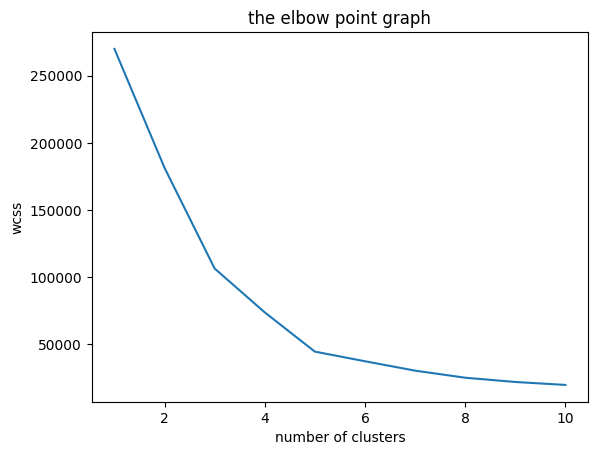

In [10]:

plt.plot(range(1,11),wcss)
plt.title('the elbow point graph')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

optimum number of clusters required = 5


training the k-means clustering model

In [11]:
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=6)
Y = kmeans.fit_predict(X)
print(Y)


[4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4
 1 4 1 4 1 4 2 4 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 3 0 3 2 3 0 3 0 3 2 3 0 3 0 3 0 3 0 3 2 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


data visualization of all the clusters

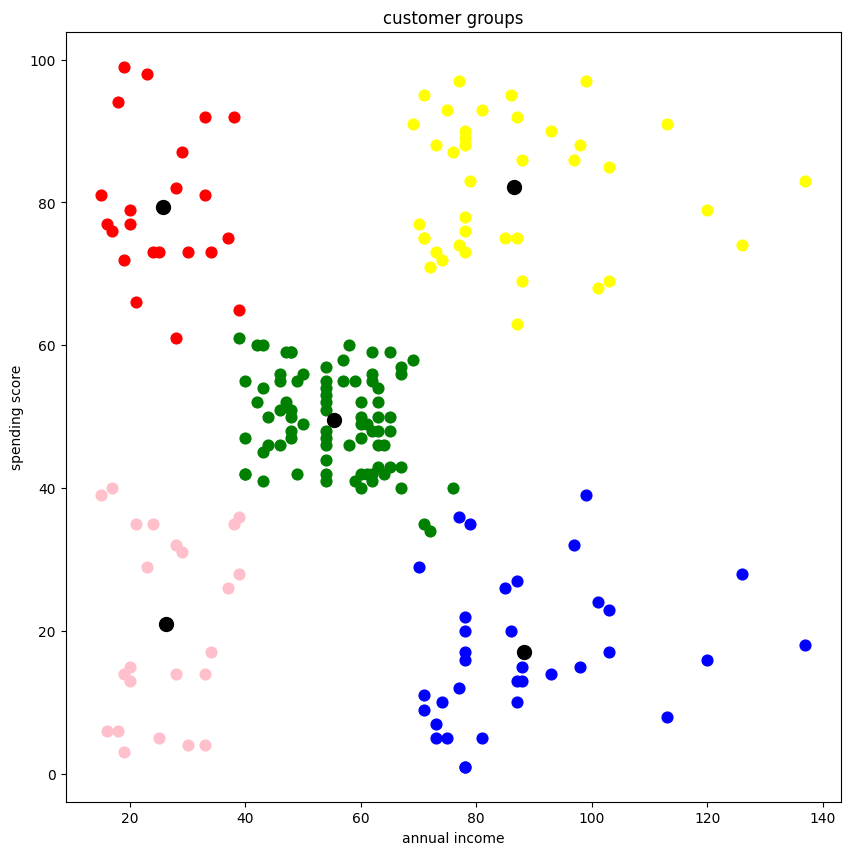

In [12]:
#plotting the clusters
plt.figure(figsize= (10,10))
plt.scatter(X[Y==0,0], X[Y==0,1], s=60,c='blue',label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=60,c='red',label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=60,c='green',label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=60,c='yellow',label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=60,c='pink',label='Cluster 5')
# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='black', label='Centroids')



plt.title('customer groups')
plt.xlabel('annual income')
plt.ylabel('spending score')
plt.show()




exporting the model in pickle library

In [13]:
import pickle
pickle.dump(kmeans,open('kmodel.pkl','wb'))